<a href="https://colab.research.google.com/github/MitchMessier/BusinessAnalytics/blob/main/Lab6_Retailer_EDA_Messier_Mitch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 6

## Outline

Repeat exercises from Lab 5, but with the *SuperStore Retail Orders* dataset


<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab6_retailer_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [129]:
import pandas as pd
import matplotlib as mpl
import sklearn as sl
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe.  
- If your record count doesn't match the source file, then resolve the issue

In [130]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/gdrive/MyDrive/Colab Notebooks/superstore_retail_orders.csv')

Mounted at /content/gdrive


In [131]:
df.head()

,customer_id,customer_name,address_line_1,city,state_province,postal_code,order_id,order_date,customer_id.1,order_id.1,product_id,quantity,product_id.1,product_name,product_price,total_amount,order_year_month,order_month
0,67,Gordy Matteau,59 Northland Circle,Wilmington,DE,19805.0,1001,2020-01-11,67,1001,106,3.0,106,Great value Juice,$1.99,$5.97,2020-01,January
1,201,Cort Paskerful,769 Buell Drive,Huntsville,AL,35810.0,1002,2019-11-22,201,1002,104,2.0,104,Desk,$85.98,$171.96,2019-11,November
2,45,Willetta Lumley,41 Ridgeway Alley,Irvine,CA,92612.0,1003,2019-09-17,45,1003,107,5.0,107,Dove deodorant,$3.99,$19.95,2019-09,September
3,106,Alison Batterton,489 Erie Hill,Richmond,VA,23293.0,1004,2019-12-09,106,1004,106,8.0,106,Great value Juice,$1.99,$15.92,2019-12,December
4,357,Martelle Paxeford,451 Manitowish Place,Richmond,VA,23293.0,1005,2019-06-08,357,1005,107,7.0,107,Dove deodorant,$3.99,$27.93,2019-06,June


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9569 entries, 0 to 9568
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       9569 non-null   int64  
 1   customer_name     9569 non-null   object 
 2   address_line_1    9448 non-null   object 
 3   city              9516 non-null   object 
 4   state_province    9569 non-null   object 
 5   postal_code       9416 non-null   float64
 6   order_id          9569 non-null   int64  
 7   order_date        9312 non-null   object 
 8   customer_id.1     9569 non-null   int64  
 9   order_id.1        9569 non-null   int64  
 10  product_id        9569 non-null   int64  
 11  quantity          9513 non-null   float64
 12  product_id.1      9569 non-null   int64  
 13  product_name      9569 non-null   object 
 14  product_price     9569 non-null   object 
 15  total_amount      9513 non-null   object 
 16  order_year_month  9312 non-null   object 


In [133]:
df.describe()

,customer_id,postal_code,order_id,customer_id.1,order_id.1,product_id,quantity,product_id.1
count,9569.000000,9416.000000,9569.000000,9569.000000,9569.000000,9569.000000,9513.000000,9569.000000
mean,282.910962,52225.007116,5107.539450,282.910962,5107.539450,106.736650,3.453380,106.736650
std,199.763947,29619.544418,2043.449403,199.763947,2043.449403,3.694805,4.393894,3.694805
min,1.000000,1105.000000,1001.000000,1.000000,1001.000000,101.000000,1.000000,101.000000
25%,127.000000,27409.000000,3393.000000,127.000000,3393.000000,104.000000,1.000000,104.000000
50%,253.000000,48295.000000,5577.000000,253.000000,5577.000000,107.000000,1.000000,107.000000
75%,376.000000,79923.000000,6829.000000,376.000000,6829.000000,110.000000,4.000000,110.000000
max,800.000000,99812.000000,8147.000000,800.000000,8147.000000,114.000000,20.000000,114.000000


## Prepare Data

➡️ Assignment Tasks
- Convert any numbers into the correct datatype if they are not already numeric
- Convert any character variables in to factors if they are appropriate for that datatype
- Check for outliers.   Remove any outliers that appear to be mistakes
- Remove rows with empty (NULL) values

In [134]:
# Convert any numbers into the correct datatype if they are not already numeric
df['postal_code'] = df['postal_code'].astype('Int64')
df['quantity'] = df['quantity'].astype('Int64')
df['product_price'] = df['product_price'].str.replace('$', '').astype(float)
df['total_amount'] = df['total_amount'].str.replace('[$,]', '', regex=True).astype(float)

<ipython-input-134-4173116182eb>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['product_price'] = df['product_price'].str.replace('$', '').astype(float)


In [135]:
# Convert any character variables in to factors if they are appropriate for that datatype
df['state_province'] = df['state_province'].astype('category')
df['city'] = df['city'].astype('category')

In [136]:
# Check for outliers. Remove any outliers that appear to be mistakes
def remove_outliers(df, threshold=3):

    z_scores = np.abs((df - df.mean()) / df.std())


    outliers = (z_scores > threshold).any(axis=1)


    df_cleaned = df[~outliers]

    return df_cleaned


df_cleaned = remove_outliers(df.select_dtypes(include=[np.number]))

print("Original DataFrame shape:", df.shape)
print("Cleaned DataFrame shape:", df_cleaned.shape)

Original DataFrame shape: (9569, 18)
Cleaned DataFrame shape: (9088, 10)


**Clarification:** I will not use the cleaned data from outliers due to the complexity. I will use the regular data going forward to graph charts. With or without outliers do not heaviliy affect the charts. Simply wanted to show I could eliminate outliers.

In [137]:
# Remove rows with empty (NULL) values
df.dropna(inplace=True)

## Create Basic Charts

➡️ Assignment Tasks
Your target variable is Total Sales (count of sales)
- Create a bar chart
- Create a histogram
- Create a box plot
- Create a scatter plot
Each visualization should bring some insight into the total sales.

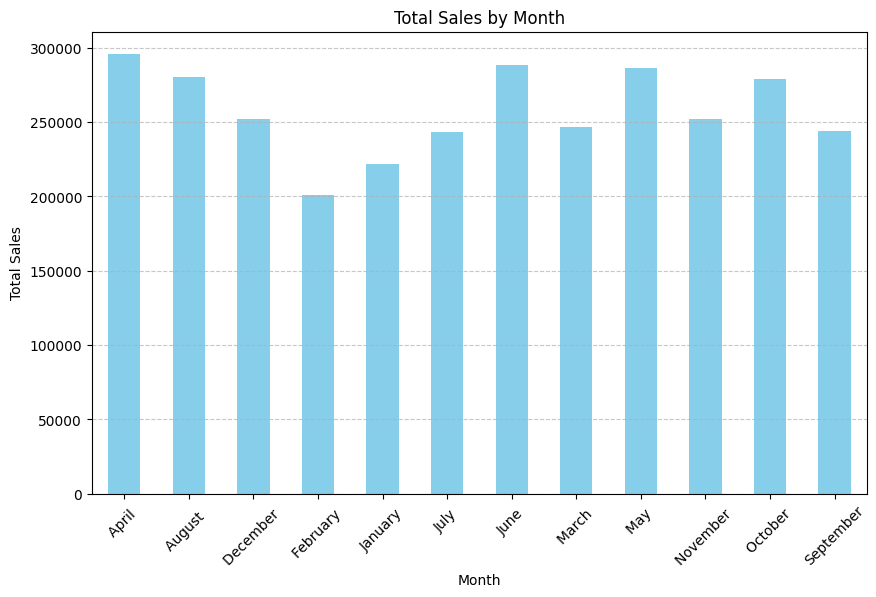

In [138]:
#bar chart
sales_by_month = df.groupby('order_month')['total_amount'].sum()

plt.figure(figsize=(10, 6))
sales_by_month.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

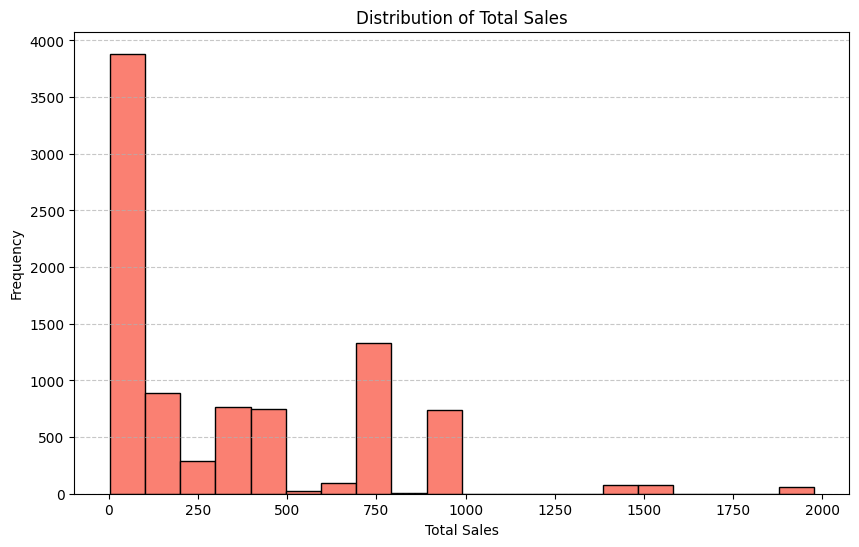

In [139]:
#histogram
plt.figure(figsize=(10, 6))
plt.hist(df['total_amount'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

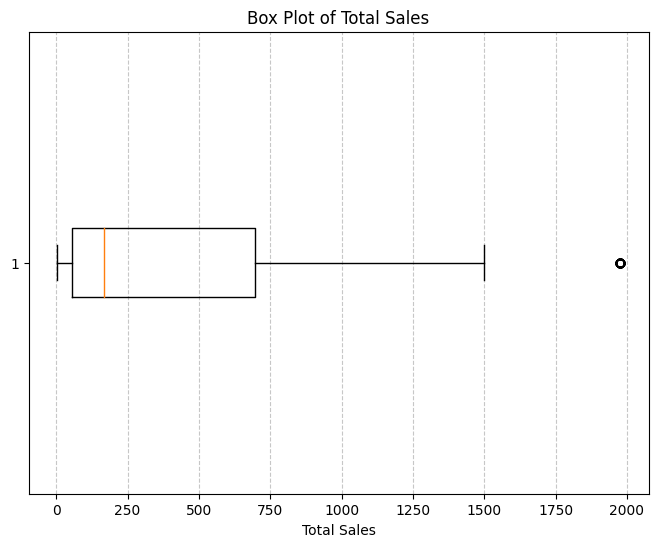

In [140]:
#box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df['total_amount'], vert=False)
plt.title('Box Plot of Total Sales')
plt.xlabel('Total Sales')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

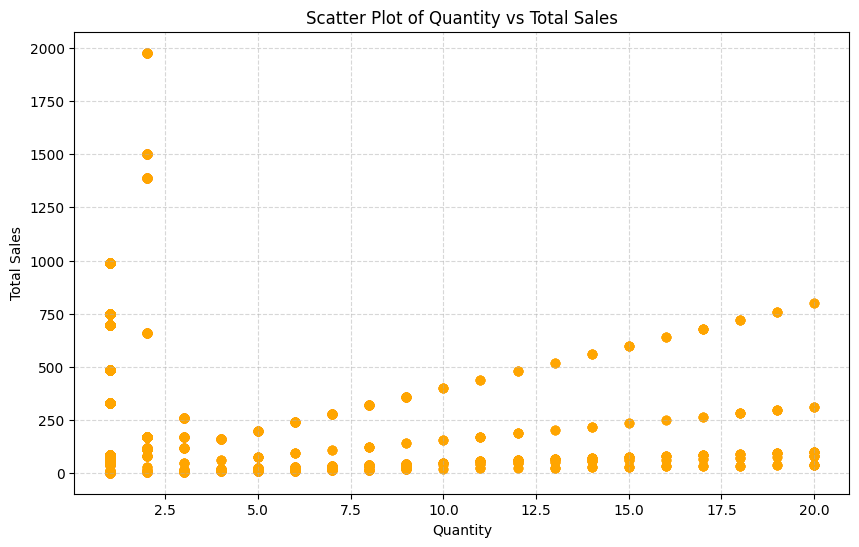

In [141]:
#scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['quantity'], df['total_amount'], color='orange', alpha=0.5)
plt.title('Scatter Plot of Quantity vs Total Sales')
plt.xlabel('Quantity')
plt.ylabel('Total Sales')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## Explore Relationships

➡️ Assignment Tasks
Your target variable is Total Sales (count of sales)
- How does the month of year affect sales?
- What are the best states for sales?
- What are the best and worst products for sales?

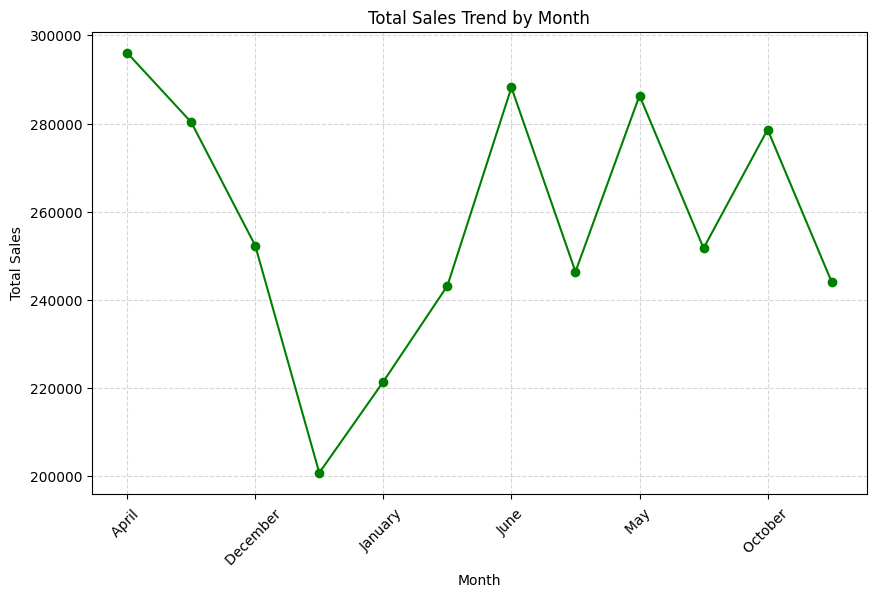

In [142]:
#month of year
sales_by_month = df.groupby('order_month')['total_amount'].sum()

plt.figure(figsize=(10, 6))
sales_by_month.plot(marker='o', color='green')
plt.title('Total Sales Trend by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

**How does the month of year affect sales?**
Sales experience a significant dip in December and rise in June. Otherwise, sales fluctuate up and down throughout the rest of the months.

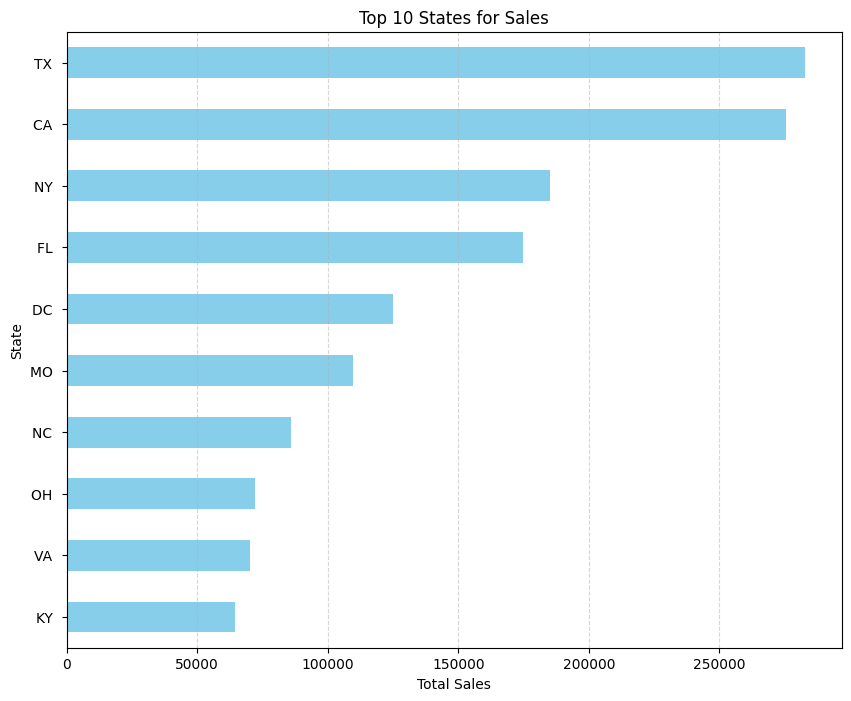

In [143]:
#sales by state
sales_by_state = df.groupby('state_province')['total_amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sales_by_state.head(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 States for Sales')
plt.xlabel('Total Sales')
plt.ylabel('State')
plt.gca().invert_yaxis()  # Invert y-axis to display highest sales at the top
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

**What are the best states for sales?**
The top three states for sales, in order, are Texas (TX), California (CA), and New York (NY).

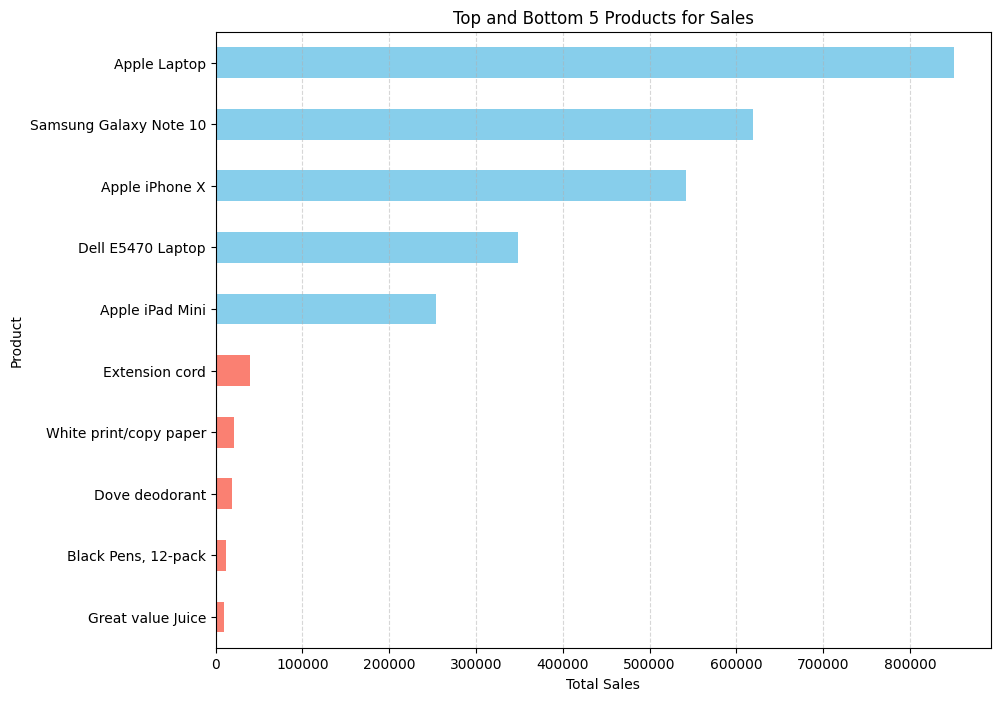

In [144]:
#sales by product
sales_by_product = df.groupby('product_name')['total_amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 8))
top_bottom_products = pd.concat([sales_by_product.head(5), sales_by_product.tail(5)])
top_bottom_products.plot(kind='barh', color=['skyblue' if i in sales_by_product.head(5) else 'salmon' for i in top_bottom_products.index])
plt.title('Top and Bottom 5 Products for Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.gca().invert_yaxis()  # Invert y-axis to display highest sales at the top
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

**What are the best and worst products for sales?**

Best Products: The best-selling products, with sales exceeding $200,000, are:
Apple Laptop
Samsung Galaxy
iPhone X
Dell Laptop
Apple Mini
These products are highlighted in light blue, indicating their popularity and high sales. All bad products in red, see above.

## Pair Plot

➡️ Assignment Tasks
- Create a pair plot showing any relevant variables, with the color determined by total sales

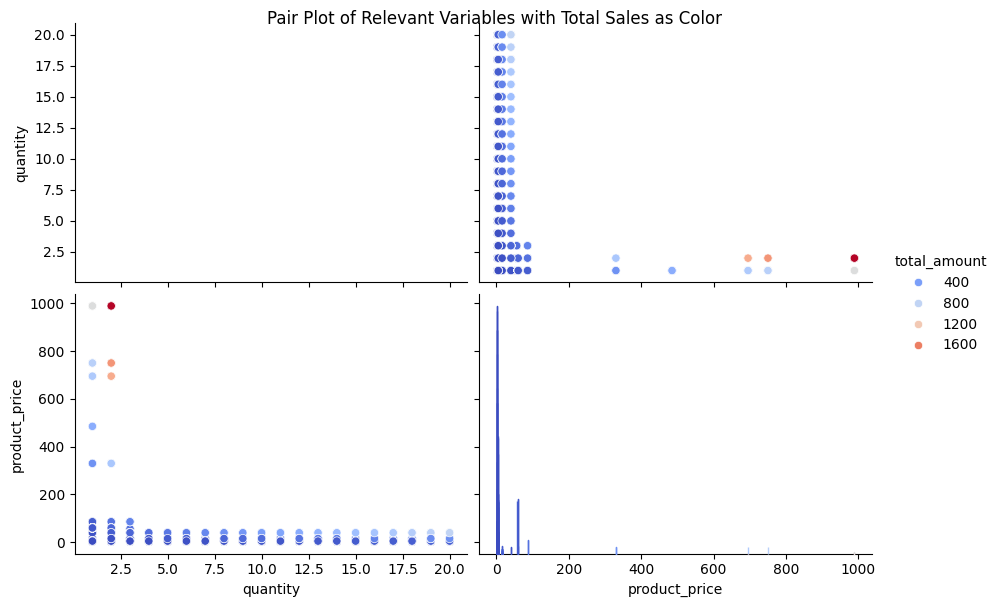

In [145]:
#pair plot
relevant_variables = ['quantity', 'product_price', 'total_amount']

sns.pairplot(df[relevant_variables], hue='total_amount', palette='coolwarm', height=3, aspect=1.5)
plt.suptitle('Pair Plot of Relevant Variables with Total Sales as Color', y=1.00)
plt.show()